<h1>Chicago Crimes Data Analytics</h1>
<hr>
<h4>Harry G. Amante</h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

In [2]:
crimes = pd.read_csv('datasets//Chicago_Crimes.csv')

In [3]:
crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


<h2>Descriptive Analytics</h2>

In [4]:
crimes.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.491230e+05,249123.000000,249123.000000,249123.000000,249120.000000,2.490330e+05,2.490330e+05,249123.000000,249033.000000,249033.000000
mean,1.358652e+07,1153.845634,11.308924,23.186823,36.238560,1.165309e+06,1.887602e+06,2024.241668,41.847162,-87.668845
std,6.473192e+05,707.959752,7.074807,13.925951,21.567485,1.616814e+04,3.146277e+04,0.428095,0.086517,0.058875
min,2.807300e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567
25%,1.352322e+07,533.000000,5.000000,10.000000,22.000000,1.153981e+06,1.860560e+06,2024.000000,41.772706,-87.710071
50%,1.361560e+07,1034.000000,10.000000,23.000000,32.000000,1.167190e+06,1.894278e+06,2024.000000,41.865616,-87.661690
75%,1.370865e+07,1732.000000,17.000000,34.000000,53.000000,1.176662e+06,1.910282e+06,2024.000000,41.909711,-87.627233
max,1.381045e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531


In [5]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    249123 non-null  int64  
 1   Case Number           249123 non-null  object 
 2   Date                  249123 non-null  object 
 3   Block                 249123 non-null  object 
 4   IUCR                  249123 non-null  object 
 5   Primary Type          249123 non-null  object 
 6   Description           249123 non-null  object 
 7   Location Description  248266 non-null  object 
 8   Arrest                249123 non-null  bool   
 9   Domestic              249123 non-null  bool   
 10  Beat                  249123 non-null  int64  
 11  District              249123 non-null  int64  
 12  Ward                  249123 non-null  int64  
 13  Community Area        249120 non-null  float64
 14  FBI Code              249123 non-null  object 
 15  

<h2>-- Checking Null Values</h2>

In [6]:
crimes.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

<h2>-- Cleaning Data</h2>

In [7]:
crimes['Location Description'] = crimes['Location Description'].fillna('unkown')
crimes['X Coordinate'] = crimes['X Coordinate'].fillna('unkown')
crimes['Y Coordinate'] = crimes['Y Coordinate'].fillna('unkown')
crimes['Location'] = crimes['Location'].fillna('unkown')
crimes['Community Area'] = crimes['Community Area'].fillna(crimes['Community Area'].mode()[0])
crimes = crimes.dropna(subset=['Latitude','Longitude'])
crimes.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

<h2> -- Changing Data Types</h2>

In [8]:
crimes['Case Number'] = crimes['Case Number'].astype('category')
crimes['Block'] = crimes['Block'].astype('category')
crimes['IUCR'] = crimes['IUCR'].astype('category')
crimes['Primary Type'] = crimes['Primary Type'].astype('category')
crimes['Description'] = crimes['Description'].astype('category')
crimes['Location Description'] = crimes['Location Description'].astype('category')
crimes['FBI Code'] = crimes['FBI Code'].astype('category')
crimes['Location'] = crimes['Location'].astype('category')

#Creating Another Columns for Month And Day of Weeks
crimes['Date'] = pd.to_datetime(crimes['Date'], dayfirst=True, errors='coerce')
crimes['Updated On'] = pd.to_datetime(crimes['Updated On'], dayfirst=True, errors='coerce')

crimes['Month'] = crimes['Date'].dt.month
crimes['DayOfWeek'] = crimes['Date'].dt.dayofweek
crimes['Hour'] = crimes['Date'].dt.hour
crimes['type_of_day'] = crimes['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [9]:
crimes.dtypes

ID                               int64
Case Number                   category
Date                    datetime64[ns]
Block                         category
IUCR                          category
Primary Type                  category
Description                   category
Location Description          category
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                 float64
FBI Code                      category
X Coordinate                    object
Y Coordinate                    object
Year                             int64
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                      category
Month                            int32
DayOfWeek                        int32
Hour                             int32
type_of_day              

<h1>Explanatory Data Analysis(EDA)</h1>

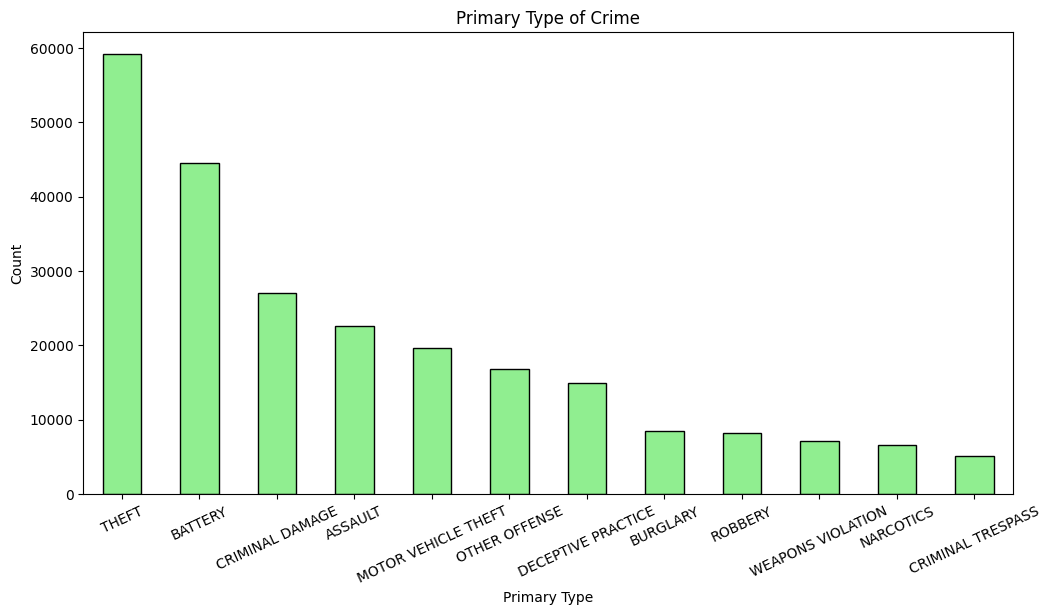

In [10]:
p_crime = crimes['Primary Type'].value_counts().head(12)

p_crime.plot(kind='bar', figsize=(12,6), edgecolor='black', color='lightgreen')
plt.title('Primary Type of Crime')
plt.ylabel('Count')
plt.xticks(rotation=25)
plt.show()

<h2>INSIGHT#1</h2>
<p>The most primary type of crime recorded in Chicago(2024-2025) is <b>THEFT</b></p>

<h2>INSIGHT#2</h2>
<p>And,the less crime happened in chicago is stated as some criminal who trespass private property</p>

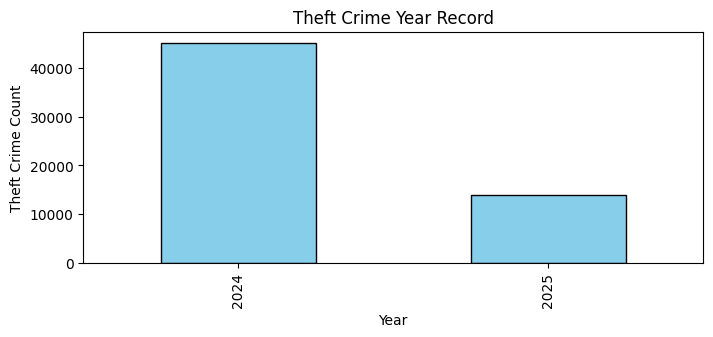

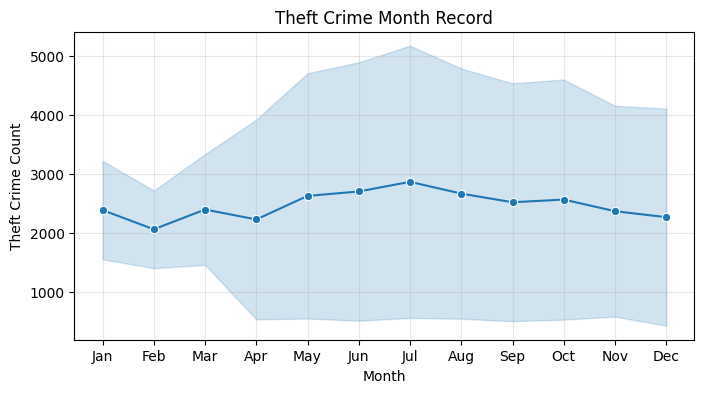

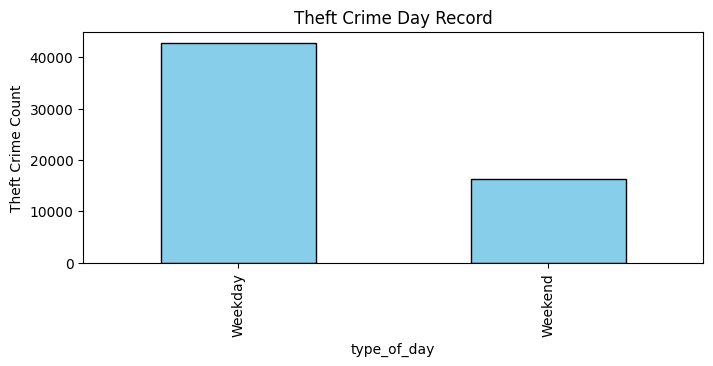

In [11]:
theft_df = crimes[crimes['Primary Type'] == 'THEFT']
theft_df['type_of_day'] = theft_df['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

theft_yr = theft_df['Year'].value_counts().sort_index()
theft_mth = theft_df.groupby(['Year','Month']).size().reset_index(name='Theft Crime Count')
theft_day = theft_df['type_of_day'].value_counts().sort_index()
#year
theft_yr.plot(kind='bar',figsize=(8,3),color='skyblue',edgecolor='black')
plt.title('Theft Crime Year Record')
plt.xlabel('Year')
plt.ylabel('Theft Crime Count')
plt.show()
#month
month_name = { 1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
theft_mth['Month'] = theft_mth['Month'].map(month_name)

plt.figure(figsize=(8,4))
sns.lineplot(data=theft_mth,x='Month',y='Theft Crime Count',marker='o')
plt.title('Theft Crime Month Record')
plt.grid(alpha=0.3)
plt.show()

#day
theft_day.plot(kind='bar',figsize=(8,3),color='skyblue',edgecolor='black')
plt.title('Theft Crime Day Record')
plt.ylabel('Theft Crime Count')
plt.show()

<h2>INSIGHT#3</h2>
<p>The theft crime rate in 2025 has greately decreased compared on 2024 crime rate.</p>
<h2>INSIGHT#4</h2>
<p>It appears that theft crime rate mostly happened in summer month(jun,july,aug).</p>
<h2>INSIGHT#5</h2>
<p>For some reason the crime rate in February is the most less, probably because of the cold weather in this month affected the outdoor activities of people live there in Chicago.</p>
<h2>INSIGHT#6</h2>
<p>Most of the THEFT crime rate happend around weekdays when people, probably doing outdoor activities or working.</p>

In [12]:
#extract the hour in theft_df
theft_df['Time hour'] = theft_df['Date'].dt.hour
#For Theft df Day Period
hour = theft_df['Time hour']#for theft_df
conditions = [
    (hour >=5 ) & (hour < 12),
    (hour >= 12 ) & (hour < 17),
    (hour >= 17) & (hour < 21),
    (hour >= 21) | (hour < 5)
]
choices = ['Morning','Day','Afternoon','Night']
theft_df['Day Period'] = np.select(conditions,choices,default='unknown')

#for crimes df Day Of Week
hour = crimes['Hour']#for crimes df
conditions = [
    (hour >=5 ) & (hour < 12),
    (hour >= 12 ) & (hour < 17),
    (hour >= 17) & (hour < 21),
    (hour >= 21) | (hour < 5)
]
choices = ['Morning','Day','Afternoon','Night']
crimes['Day_Period'] = np.select(conditions,choices,default='unknown')

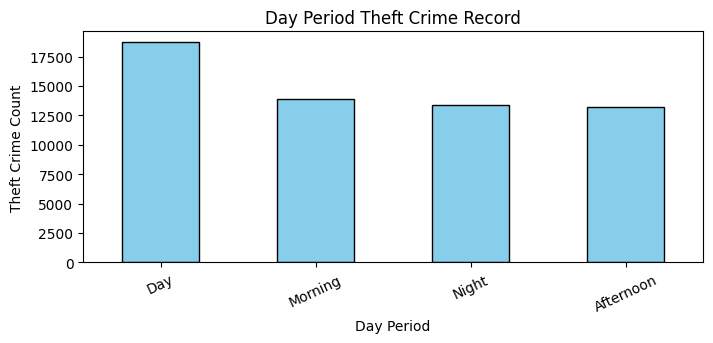

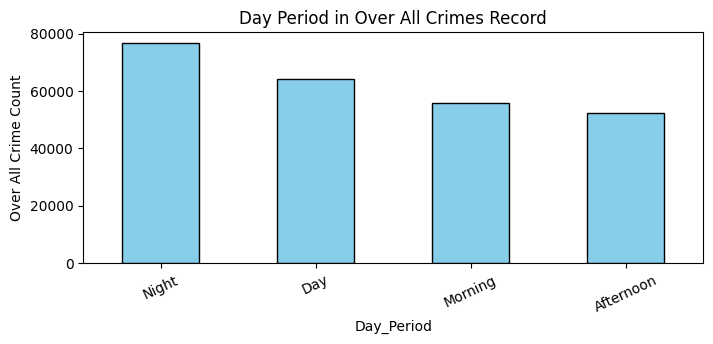

In [13]:
day_period = theft_df['Day Period'].value_counts().plot(kind='bar',figsize=(8,3),color='skyblue',edgecolor='black')
plt.title('Day Period Theft Crime Record')
plt.ylabel('Theft Crime Count')
plt.xticks(rotation=25)
plt.show()

day_period = crimes['Day_Period'].value_counts().plot(kind='bar',figsize=(8,3),color='skyblue',edgecolor='black')
plt.title('Day Period in Over All Crimes Record')
plt.ylabel('Over All Crime Count')
plt.xticks(rotation=25)
plt.show()

<h2>INSIGHT#7</h2>
<p>The Theft crime has been reported or happened mostly on <b>DAY<b> around (12:00-17:00) hours. </p>
<h2>INSIGHT#8</h2>
<p>Unlike in the specific theft crime record,The over All crime record has been reported or happened mostly on <b>NIGHT<b> around (21:00-04:00) hours. </p>

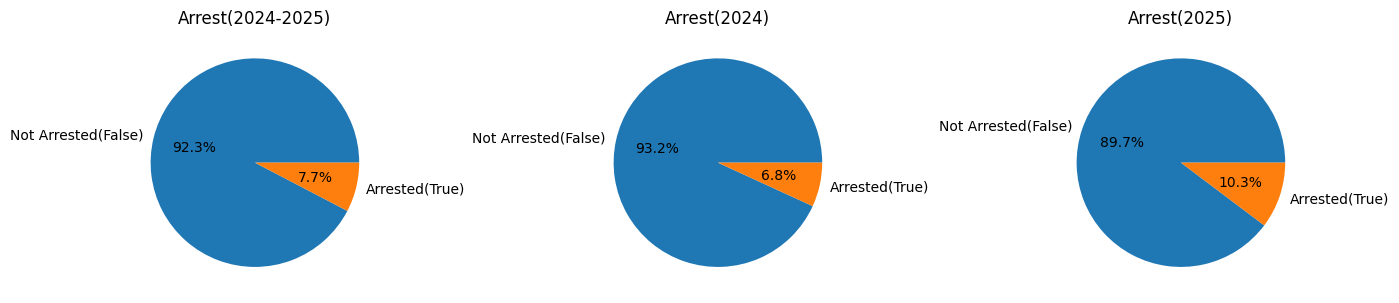

In [14]:
ye2024_df = theft_df[theft_df['Year'] == 2024]
ye2025_df = theft_df[theft_df['Year'] == 2025]

arrest = theft_df['Arrest'].value_counts()
arrest24 = ye2024_df['Arrest'].value_counts()
arrest25 = ye2025_df['Arrest'].value_counts()

fig, axis = plt.subplots(1,3 , figsize=(14,10))

arrestname = [ 'Not Arrested(False)', 'Arrested(True)']

axis[0].pie(arrest,labels=arrestname, autopct='%1.1f%%')
axis[0].set_title('Arrest(2024-2025)')

axis[1].pie(arrest24,labels=arrestname, autopct='%1.1f%%')
axis[1].set_title('Arrest(2024)')

axis[2].pie(arrest25,labels=arrestname, autopct='%1.1f%%')
axis[2].set_title('Arrest(2025)')

plt.tight_layout()
plt.show()

<h2>INSIGHT#9</h2>
<p>It seems that even though theft crime is the most reported primary type of crime in Chicago(2024-2025) there is a lot of cases were criminal is not being arrested.</p>
<h2>INSIGHT#10</h2>
<p>In year 2024 despite being the the most theft crime rate it's arrested case percentage is slightly small compared to  year 2025. </p>

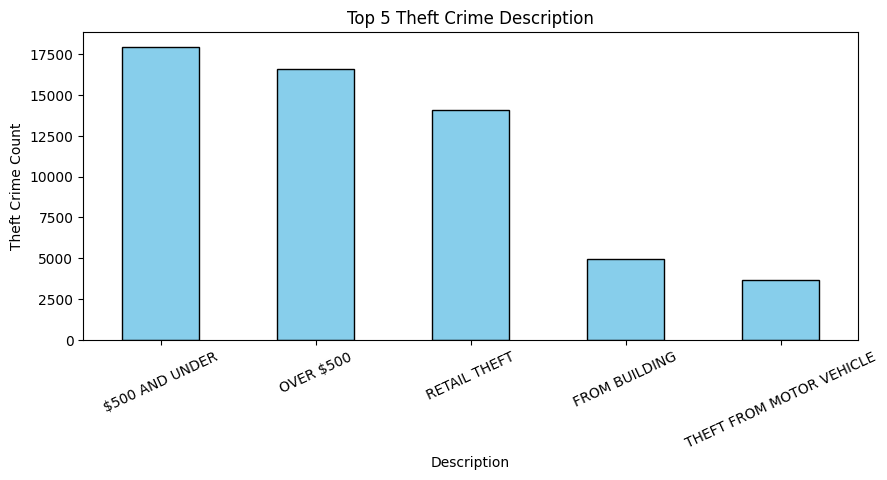

In [15]:
theft_desc = theft_df['Description'].value_counts().head(5).plot(kind='bar',figsize=(10,4),color='skyblue',edgecolor='black')
plt.title('Top 5 Theft Crime Description')
plt.ylabel('Theft Crime Count')
plt.xticks(rotation=25)
plt.show()

<h2>INSIGHT#11</h2>
<p>The most common theft is <b>500 DOLLAR AND UNDER</b> with nearly 18,000 cases, and followed by <strong>OVER 500 DOLLAR</strong>.</p>
<h2>INIGHT#12</h2>
<p>The rank third <b>RETAIL THEFT</b> seems concerning becaues it mean that shop and business are being targeted.</p>

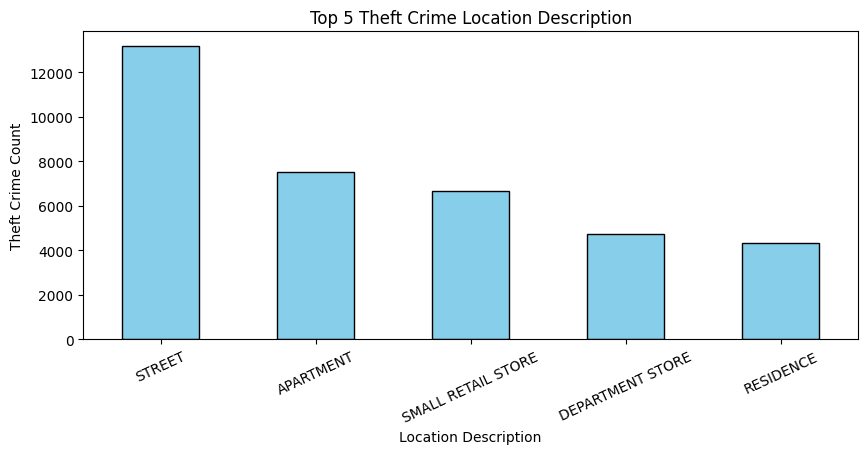

In [16]:
theft_desc = theft_df['Location Description'].value_counts().head(5).plot(kind='bar',figsize=(10,4),color='skyblue',edgecolor='black')
plt.title('Top 5 Theft Crime Location Description')
plt.ylabel('Theft Crime Count')
plt.xticks(rotation=25)
plt.show()

<h2>INSIGHT#13</h2>
<p>The location description of theft crimes is commonly happened or reported in the <b>STREET</b>, probably theft criminal is mostly active there is a crowded or in secluded place in the street.</p>
<h2>INSIGHT#14</h2>
<p>It seems that the place of victim shop or business are <b>SMALL RETAIL STORE and DEPARTMENT STORE</b>.</p>

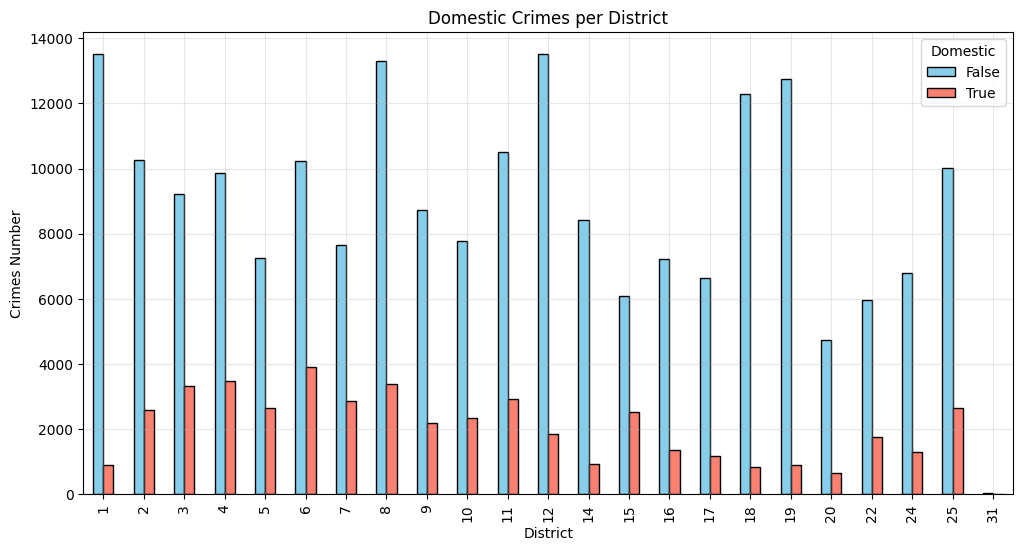

In [17]:
ares = crimes.groupby(['Domestic','District']).size().unstack(level=0)

ares.plot(kind='bar',figsize=(12,6),color=['skyblue','salmon'],edgecolor='black')
plt.ylabel('Crimes Number')
plt.title('Domestic Crimes per District')
plt.grid(alpha=0.3)
plt.show()

<h2>INSIGHT#15</h2>
<p>In every district it show that Non-Domestic crime is much higher than domestic crime.</p>
<h2>INSIGHT#16</h2>
<p>The district that recorded most Non-domestic or crimes that is victim is not related to the suspect are <b>district 12, 1, 8, 18 and 19</b>.</p>
<h2>INSIGHT17</h2>
<p>District 3,4,6, and 8 shows the higher record of Domestic crimes or suspect and victims are relatives.</p>
<h2>INSIGHT#18</h2>
<p>Some districts (like 20, 22,15) have both low domestic and low overall crime, suggesting relatively safer areas.</p>

<h1>Chicago District Comparison</h1>

<h2>-- District 1 Crime Analysis</h2>

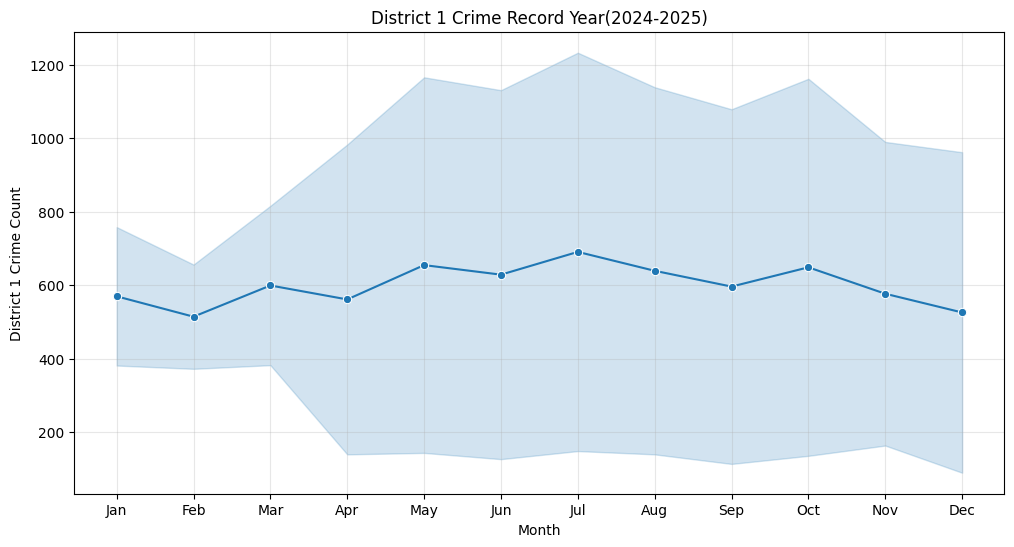

In [18]:
district1_df = crimes[crimes['District'] == 1]

d1_yr_mnth = district1_df.groupby(['Year','Month']).size().reset_index(name='District 1 Crime Count')

month_name = { 1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
d1_yr_mnth['Month'] = d1_yr_mnth['Month'].map(month_name)

plt.figure(figsize=(12,6))
sns.lineplot(data=d1_yr_mnth,x='Month',y='District 1 Crime Count',marker='o')
plt.title('District 1 Crime Record Year(2024-2025)')
plt.grid(alpha=0.3)
plt.show()


<h2>INSIGHT#19</h2>
<p>The most crimes recorded in district 1 year 2024-2025 is in the month of May, July, and October </p>
<h2>INSIGHT#20</h2>
<p>The month of December, January, and February show a less crime record compared to other month, probably because of the season condition that affect people outdoor activities in chicago. </p>

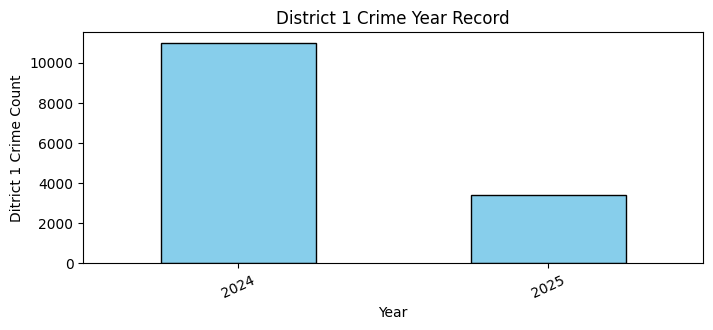

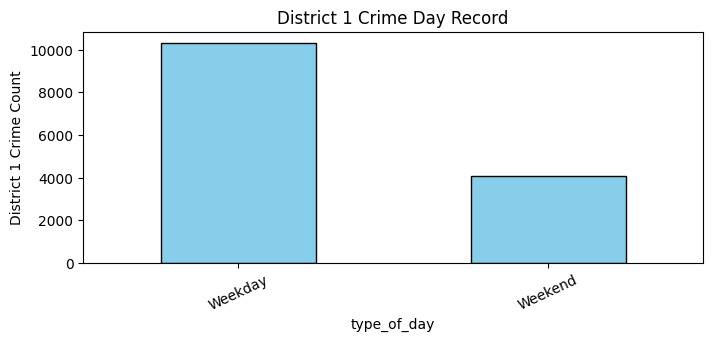

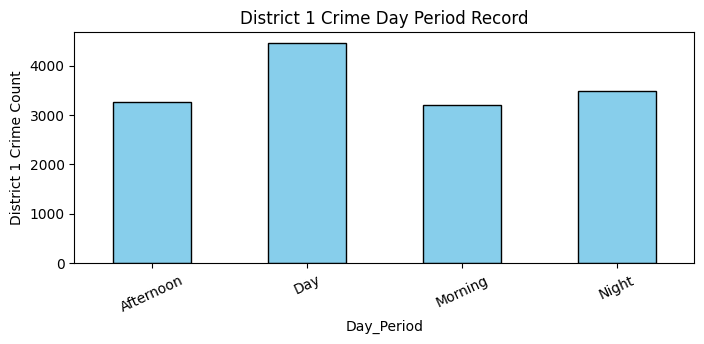

In [19]:
crime_yr = district1_df['Year'].value_counts().sort_index()
crime_per = district1_df['type_of_day'].value_counts().sort_index()
crime_day = district1_df['Day_Period'].value_counts().sort_index()
 
#year
crime_yr.plot(kind='bar',figsize=(8,3),color='skyblue',edgecolor='black')
plt.title('District 1 Crime Year Record')
plt.xlabel('Year')
plt.ylabel('Ditrict 1 Crime Count')
plt.xticks(rotation=25)
plt.show()

#day
crime_per.plot(kind='bar',figsize=(8,3),color='skyblue',edgecolor='black')
plt.title('District 1 Crime Day Record')
plt.ylabel('District 1 Crime Count')
plt.xticks(rotation=25)
plt.show()

#day period
crime_day.plot(kind='bar',figsize=(8,3),color='skyblue',edgecolor='black')
plt.title('District 1 Crime Day Period Record')
plt.ylabel('District 1 Crime Count')
plt.xticks(rotation=25)
plt.show()

<h2>INSIGHT#21</h2>
<p>District 1 year (2024-2025) crime year was noticeble that crime rate in 2024 is much higher than 2025</p>
<h2>INSIGHT#22</h2>
<p>The ditrict 1 day crimes do happen the most on weekday.</p>
<h2>INSIGHT#23</h2>
<p>In district 1 the people should be more carefull in Day time because the report shows that day time is when crimes do happen.</p>

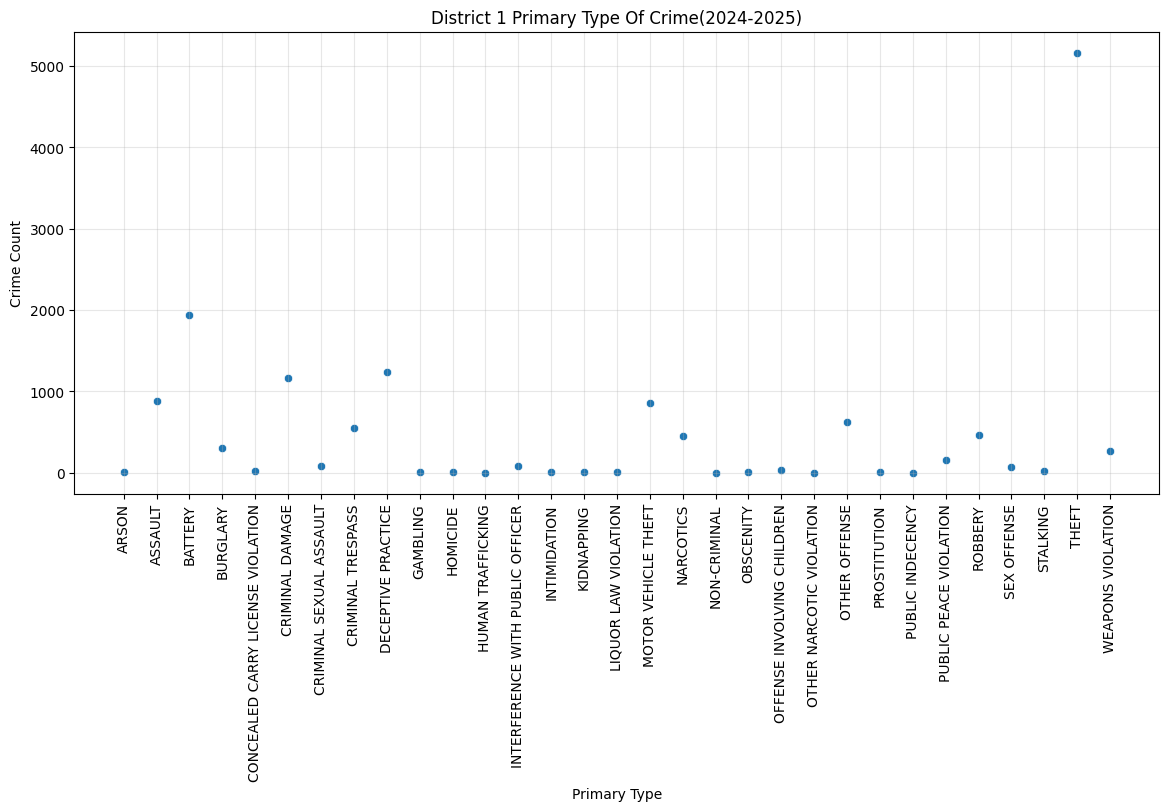

In [20]:
comn_crime = district1_df['Primary Type'].value_counts().reset_index(name='Crime Count')
comn_crime

plt.figure(figsize=(14,6))
sns.scatterplot(data=comn_crime, x='Primary Type',y='Crime Count')
plt.xticks(rotation=90)
plt.title('District 1 Primary Type Of Crime(2024-2025)')
plt.grid(alpha=0.3)
plt.show()

<h2>INSIGHT#24</h2>
<p>In District 1 theft crime is also the most reported crime, followed by Battery crime like intentionally or knowingly cauing bodily harm to others.</p>
<h2>INSIGHT#25</h2>
<p>There is crime in District 1 that is even though reported in least number like(Human Trafficking, Kidnapping, Intimidation) that goverment should focus on.</p>

Text(0.5, 1.0, 'Arrest Record (2024-2025)')

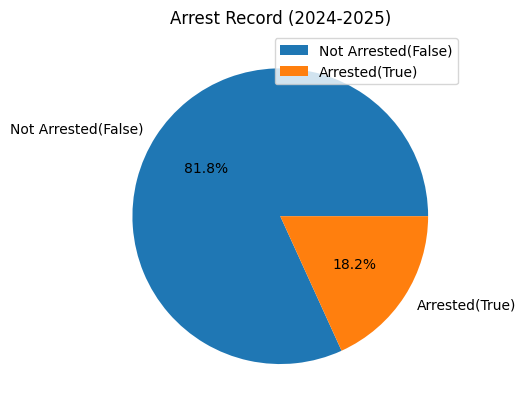

In [21]:
arrest = district1_df['Arrest'].value_counts()

arrestname = [ 'Not Arrested(False)', 'Arrested(True)']

plt.pie(arrest,labels=arrestname, autopct='%1.1f%%')
plt.legend()
plt.title('Arrest Record (2024-2025)')

<h2>INSIGHT#26</h2>
<p>As show in pie chart surprisingly there is a lot of crime that is being not arrested compared to crime that arrested.</p>

In [22]:
print('DISTRICT 1 MAP')
dstrt1_loc = list(zip(district1_df['Latitude'],district1_df['Longitude']))
dstrt1_map = folium.Map(location=[district1_df['Latitude'].mean(),district1_df['Longitude'].mean()],zoom_start=10)
HeatMap(dstrt1_loc).add_to(dstrt1_map)
dstrt1_map.save('district1_map.html')
dstrt1_map


DISTRICT 1 MAP


<h2>-- District 8 Crimes Analyis</h2>

In [23]:
district8_df = crimes[crimes['District'] == 8]

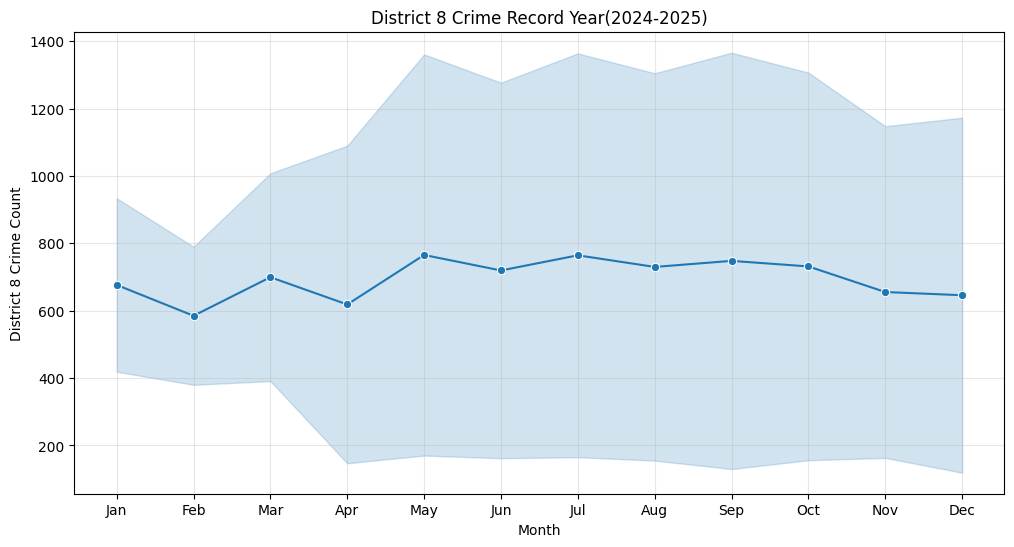

In [24]:
d1_yr_mnth = district8_df.groupby(['Year','Month']).size().reset_index(name='District 8 Crime Count')

month_name = { 1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
d1_yr_mnth['Month'] = d1_yr_mnth['Month'].map(month_name)

plt.figure(figsize=(12,6))
sns.lineplot(data=d1_yr_mnth,x='Month',y='District 8 Crime Count',marker='o')
plt.title('District 8 Crime Record Year(2024-2025)')
plt.grid(alpha=0.3)
plt.show()

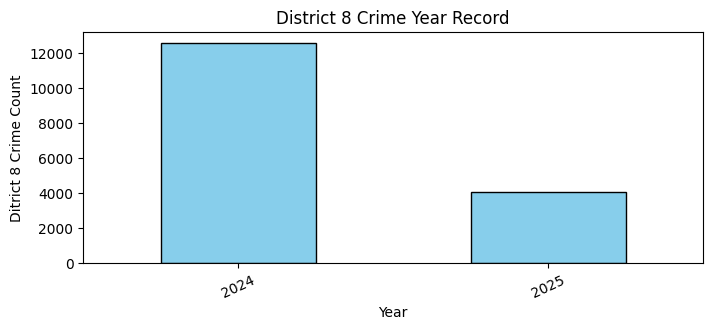

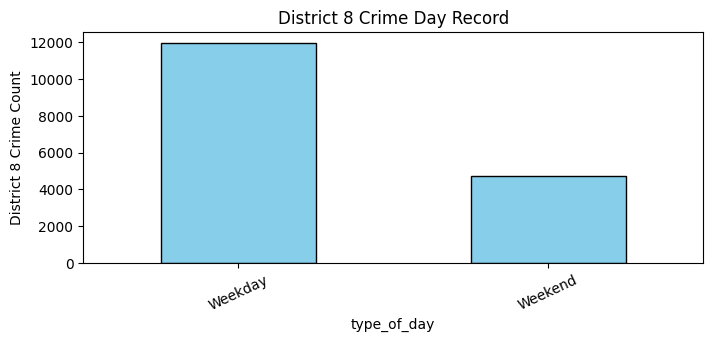

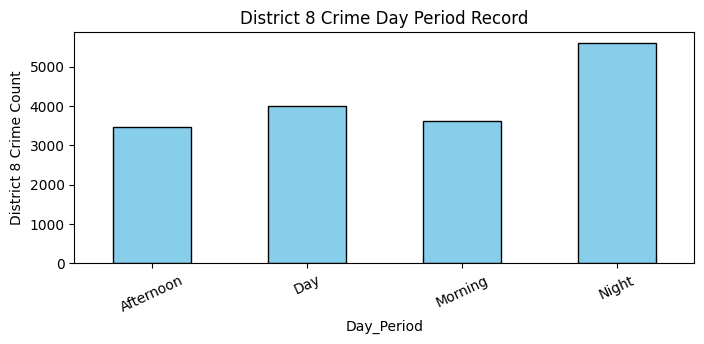

In [25]:
crime_yr = district8_df['Year'].value_counts().sort_index()
crime_per = district8_df['type_of_day'].value_counts().sort_index()
crime_day = district8_df['Day_Period'].value_counts().sort_index()
 
#year
crime_yr.plot(kind='bar',figsize=(8,3),color='skyblue',edgecolor='black')
plt.title('District 8 Crime Year Record')
plt.xlabel('Year')
plt.ylabel('Ditrict 8 Crime Count')
plt.xticks(rotation=25)
plt.show()

#day
crime_per.plot(kind='bar',figsize=(8,3),color='skyblue',edgecolor='black')
plt.title('District 8 Crime Day Record')
plt.ylabel('District 8 Crime Count')
plt.xticks(rotation=25)
plt.show()

#day period
crime_day.plot(kind='bar',figsize=(8,3),color='skyblue',edgecolor='black')
plt.title('District 8 Crime Day Period Record')
plt.ylabel('District 8 Crime Count')
plt.xticks(rotation=25)
plt.show()

<h2>INSIGHT#27</h2>
<p>District 8 crimes record in (2024-2025) is same as district 1 with the most record of crime in 2024.</p>
<h2>INSIGHT#28</h2>
<p>Also, District 8 Day crime record is thesame in district 1 which usually happened in weekdays.</p>
<h2>INSIGHT#29</h2>
<p>Surprisingly, unlike in district 1 in district 8 the crime usually happen when it is a<b>Night Time</b>.</p>

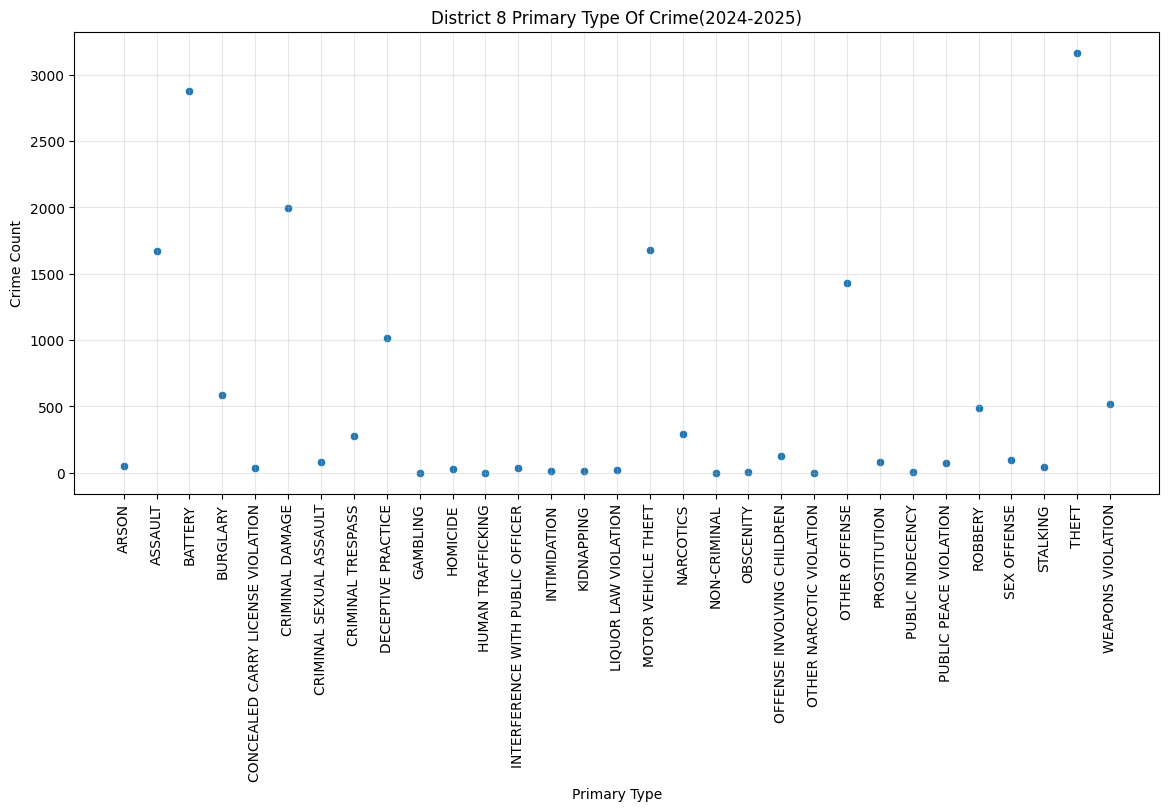

In [26]:
comn_crime = district8_df['Primary Type'].value_counts().reset_index(name='Crime Count')
comn_crime

plt.figure(figsize=(14,6))
sns.scatterplot(data=comn_crime, x='Primary Type',y='Crime Count')
plt.xticks(rotation=90)
plt.title('District 8 Primary Type Of Crime(2024-2025)')
plt.grid(alpha=0.3)
plt.show()

<h2>INSIGHT#30</h2>
<p>The primary type of crime in district 8 is the same in district 1 which is the THEFT and BATTERY crime.</p>

Text(0.5, 1.0, 'Arrest Record (2024-2025)')

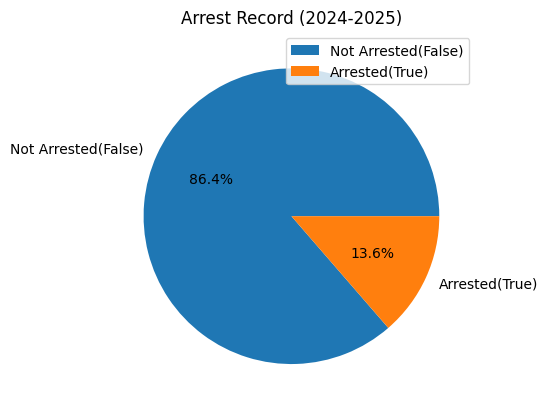

In [27]:
arrest = district8_df['Arrest'].value_counts()

arrestname = [ 'Not Arrested(False)', 'Arrested(True)']

plt.pie(arrest,labels=arrestname, autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.title('Arrest Record (2024-2025)')

<h2>INSIGHT#31</h2>
<p>As usual there is a big difference in count of being arrested and not, with the arrested cases is being the lowest.</p>

In [28]:
print('DISTRICT 8 MAP')
dstrt8_loc = list(zip(district8_df['Latitude'],district8_df['Longitude']))
dstrt8_map = folium.Map(location=[district8_df['Latitude'].mean(),district8_df['Longitude'].mean()],zoom_start=10)
HeatMap(dstrt8_loc).add_to(dstrt8_map)
dstrt8_map.save('district8_map.html')
dstrt8_map


DISTRICT 8 MAP


<p>Etra Insight for District 8 map I just noticed that almost all the location crime happened is in the street.</p>

<h2>-- District 20 Crimes Analyis</h2>

In [29]:
district20_df = crimes[crimes['District'] == 20]

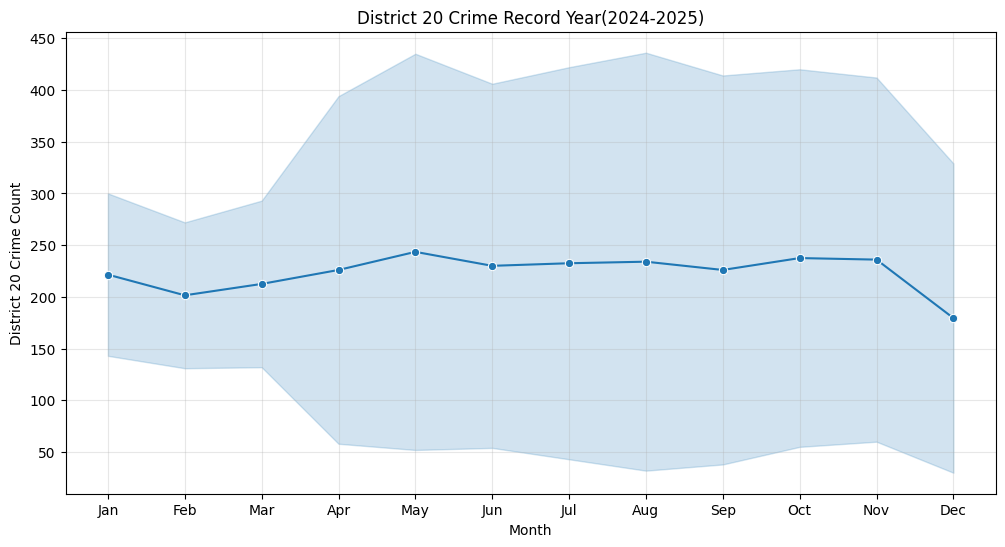

In [30]:
d1_yr_mnth = district20_df.groupby(['Year','Month']).size().reset_index(name='District 20 Crime Count')

month_name = { 1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
d1_yr_mnth['Month'] = d1_yr_mnth['Month'].map(month_name)

plt.figure(figsize=(12,6))
sns.lineplot(data=d1_yr_mnth,x='Month',y='District 20 Crime Count',marker='o')
plt.title('District 20 Crime Record Year(2024-2025)')
plt.grid(alpha=0.3)
plt.show()


<h2>INSIGHT#32</h2>
<p>The month with a higher recorded crime rate in District 20 is on May, October, and November, which is kind of different to other disrict which showa low crime rate on November.</p>
<h2>INSIGHT#33</h2>
<p>Month of December show the lowest crime record, then slightly increase on month of January, then drop again in the month of February.</p>

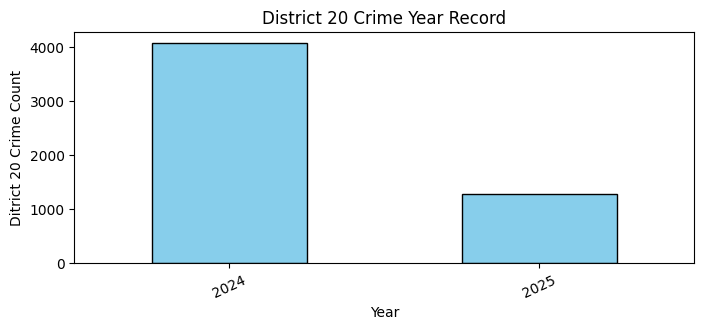

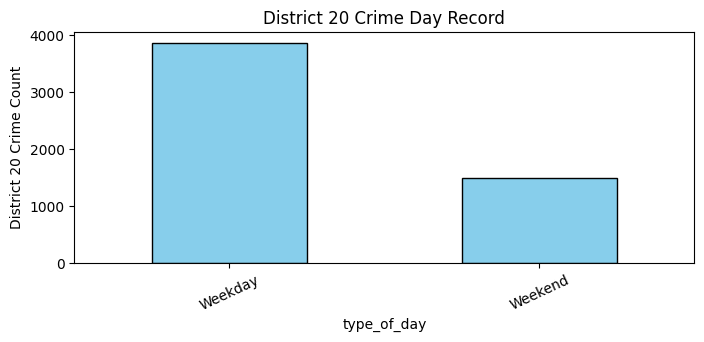

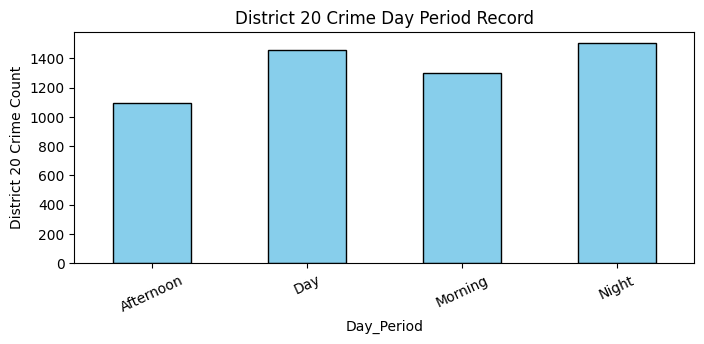

In [31]:
crime_yr = district20_df['Year'].value_counts().sort_index()
crime_per = district20_df['type_of_day'].value_counts().sort_index()
crime_day = district20_df['Day_Period'].value_counts().sort_index()
 
#year
crime_yr.plot(kind='bar',figsize=(8,3),color='skyblue',edgecolor='black')
plt.title('District 20 Crime Year Record')
plt.xlabel('Year')
plt.ylabel('Ditrict 20 Crime Count')
plt.xticks(rotation=25)
plt.show()

#day
crime_per.plot(kind='bar',figsize=(8,3),color='skyblue',edgecolor='black')
plt.title('District 20 Crime Day Record')
plt.ylabel('District 20 Crime Count')
plt.xticks(rotation=25)
plt.show()

#day period
crime_day.plot(kind='bar',figsize=(8,3),color='skyblue',edgecolor='black')
plt.title('District 20 Crime Day Period Record')
plt.ylabel('District 20 Crime Count')
plt.xticks(rotation=25)
plt.show()

<h2>INSIGHT#34</h2>
<p>District 20 Year Record(2024-2025) shows a result simillar to district 1 and 8 with a higher crime record in year 2024 and 2025.</p>
<h2>INSIGHT#35</h2>
<p>Also, Disstrict 20 show a results that criminal is mostly active in weekdays.</p>
<h2>INSIGHT#36</h2>
<p>Further more, District 20 shows that crime rate on DAY and NIGHT times has no big difference in record.</p>

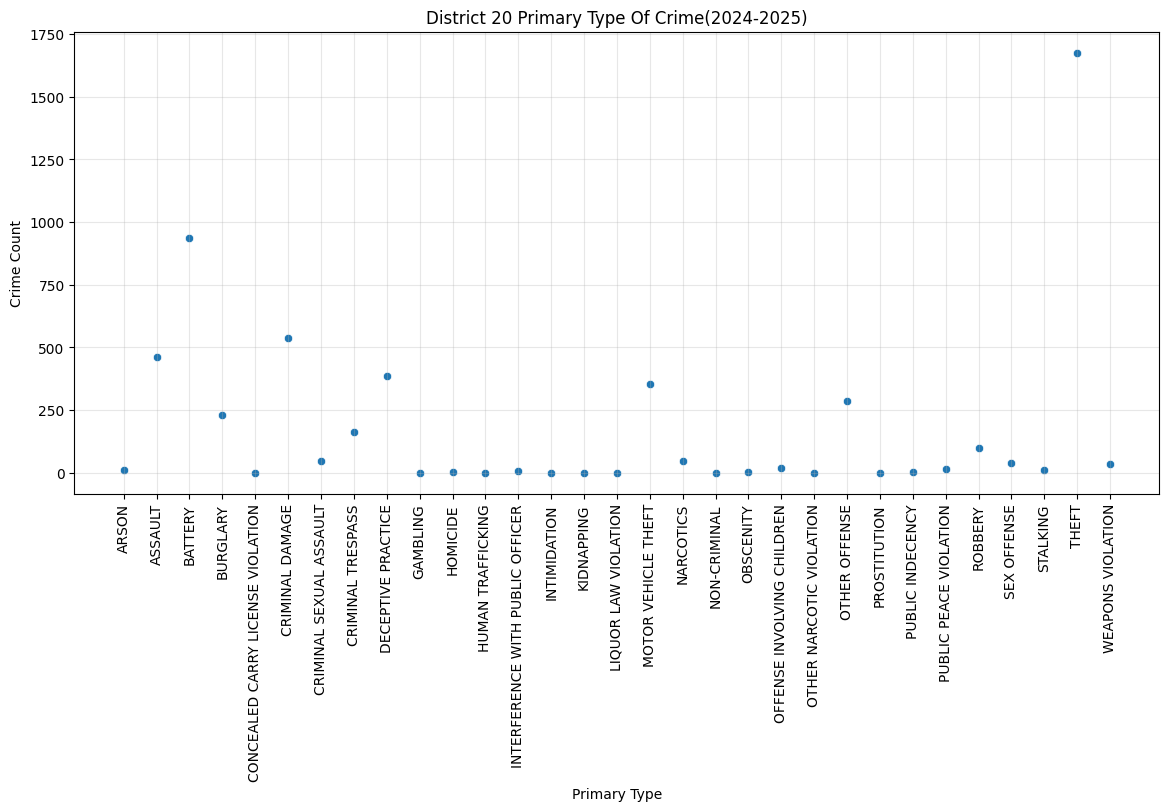

In [32]:
comn_crime = district20_df['Primary Type'].value_counts().reset_index(name='Crime Count')
comn_crime

plt.figure(figsize=(14,6))
sns.scatterplot(data=comn_crime, x='Primary Type',y='Crime Count')
plt.xticks(rotation=90)
plt.title('District 20 Primary Type Of Crime(2024-2025)')
plt.grid(alpha=0.3)
plt.show()

<h2>INSIGHT#37</h2>
<p>The primary type of crimes in District 20 is THEFT and BATTERY which is similar to ditrict 1 and district 8.</p>

Text(0.5, 1.0, 'Arrest Record (2024-2025)')

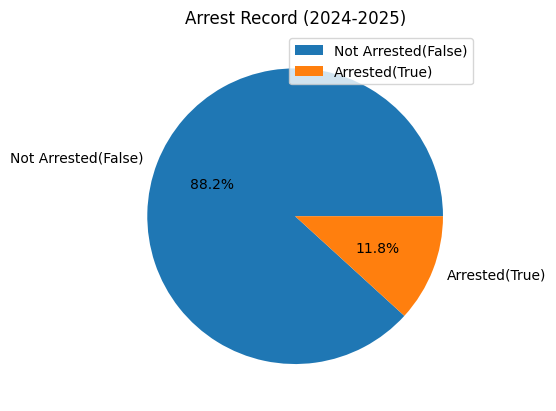

In [33]:
arrest = district20_df['Arrest'].value_counts()

arrestname = [ 'Not Arrested(False)', 'Arrested(True)']

plt.pie(arrest,labels=arrestname, autopct='%1.1f%%')
plt.legend()
plt.title('Arrest Record (2024-2025)')

<h2>INSIGHT#38</h2>
<p>District 20 is no different to district 8 and 1 which it comes to arrest record in (2024-2025) that shows a big differece on number of arrested criminal and not.</p>

In [34]:
print('DISTRICT 20 MAP')
dstrt20_loc = list(zip(district20_df['Latitude'],district20_df['Longitude']))
dstrt20_map = folium.Map(location=[district20_df['Latitude'].mean(),district20_df['Longitude'].mean()],zoom_start=10)
HeatMap(dstrt20_loc).add_to(dstrt20_map)
dstrt20_map.save('district20_map.html')
dstrt20_map

DISTRICT 20 MAP
